# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [2]:
import wbdata
import pandas as pd

In [32]:
import wbdata
import pandas as pd

paises = ["ARG", "DZA"]  # Argentina y Argelia
indicadores = {
    "NY.GDP.PCAP.PP.CD": "GDP_PCAP_PPP",  # PIB per cápita (PPA)
    "SL.UEM.TOTL.ZS": "Unemployment"  # Tasa de Desempleo 
}

try:
    df = wbdata.get_dataframe(indicadores, country=paises) 
except Exception as e:
    print(f"Error: {e}")
    exit()

if df is not None:
    df_gdp_pc = df.pivot_table(index='date', columns='country', values='GDP_PCAP_PPP', dropna=False).reset_index()
    df_unemployment = df.pivot_table(index='date', columns='country', values='Unemployment', dropna=False).reset_index()

    print("\nPIB per cápita (PPA):")
    print(df_gdp_pc)

    print("\nDesempleo:")
    print(df_unemployment)


PIB per cápita (PPA):
country  date       Algeria     Argentina
0        1960           NaN           NaN
1        1961           NaN           NaN
2        1962           NaN           NaN
3        1963           NaN           NaN
4        1964           NaN           NaN
..        ...           ...           ...
59       2019  13892.533345  23516.826198
60       2020  12676.513056  22393.347958
61       2021  14496.865470  26300.274261
62       2022  15836.094437  29597.693843
63       2023  16824.487903  30082.304525

[64 rows x 3 columns]

Desempleo:
country  date  Algeria  Argentina
0        1960      NaN        NaN
1        1961      NaN        NaN
2        1962      NaN        NaN
3        1963      NaN        NaN
4        1964      NaN        NaN
..        ...      ...        ...
59       2019   12.259      9.843
60       2020   14.057     11.461
61       2021   13.630      8.736
62       2022   12.346      6.805
63       2023   11.701      6.139

[64 rows x 3 columns]


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [22]:
import pandas as pd
if df_gdp_pc is not None and df_unemployment is not None:
    # 1. Estadística Descriptiva del PIB per cápita (PPA)
    print("\nEstadística Descriptiva - PIB per cápita (PPA):")
    print("\nArgentina:\n", df_gdp_pc['Argentina'].describe())
    print("\nArgelia:\n", df_gdp_pc['Algeria'].describe())

    # 2. Estadística Descriptiva de la Tasa de Desempleo
    print("\n\nEstadística Descriptiva - Tasa de Desempleo:")
    print("\nArgentina:\n", df_unemployment['Argentina'].describe())
    print("\nArgelia:\n", df_unemployment['Algeria'].describe())


Estadística Descriptiva - PIB per cápita (PPA):

Argentina:
 count       34.000000
mean     16111.389771
std       6342.852520
min       7158.308491
25%      10979.483143
50%      15512.826607
75%      19921.529600
max      30082.304525
Name: Argentina, dtype: float64

Argelia:
 count       34.000000
mean     11657.590849
std       2922.702546
min       7462.647588
25%       8571.276793
50%      12733.927158
75%      13871.237905
max      16824.487903
Name: Algeria, dtype: float64


Estadística Descriptiva - Tasa de Desempleo:

Argentina:
 count    33.000000
mean     10.639758
std       3.951450
min       5.440000
25%       7.579000
50%       9.220000
75%      13.522000
max      19.590000
Name: Argentina, dtype: float64

Argelia:
 count    33.000000
mean     17.804364
std       7.621145
min       9.820000
25%      11.330000
50%      13.790000
75%      25.900000
max      31.840000
Name: Algeria, dtype: float64


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

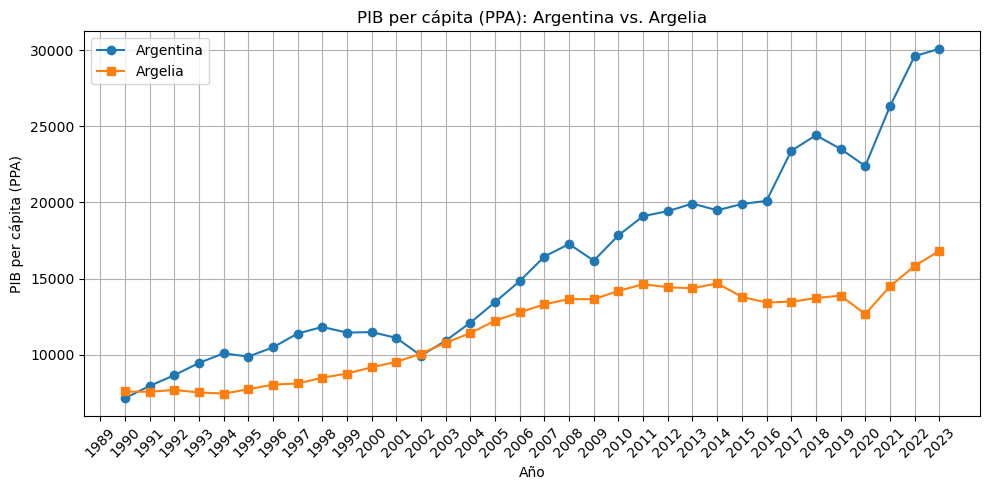

In [61]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt


if df_gdp_pc is not None and df_unemployment is not None:
    plt.figure(figsize=(10, 5)) 
    plt.plot(df_gdp_pc['date'], df_gdp_pc['Argentina'], label='Argentina', marker='o')
    plt.plot(df_gdp_pc['date'], df_gdp_pc['Algeria'], label='Argelia', marker='s')
    plt.xlabel('Año')
    plt.ylabel('PIB per cápita (PPA)')
    plt.title('PIB per cápita (PPA): Argentina vs. Argelia')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

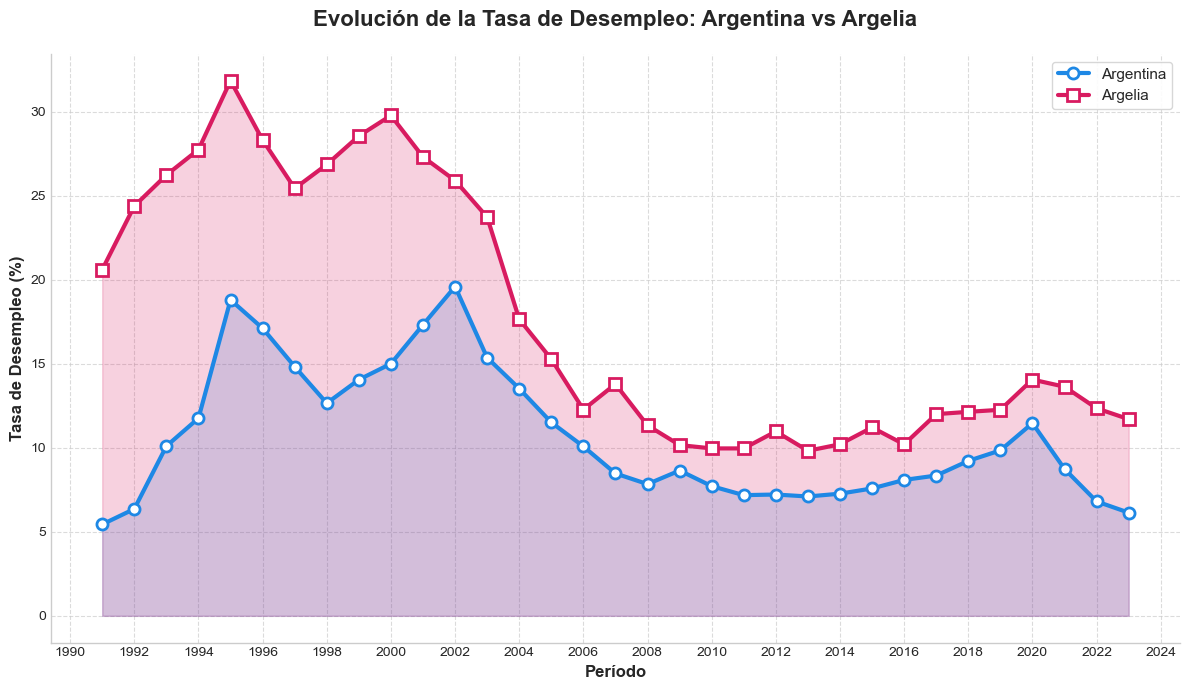

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Asegurar que las fechas estén en formato datetime
x = pd.to_datetime(df_unemployment['date'])
y1 = df_unemployment['Argentina']
y2 = df_unemployment['Algeria']

# Crear figura con estilo mejorado
plt.style.use('seaborn-v0_8-whitegrid')  # Usar un estilo más moderno
fig, ax = plt.subplots(figsize=(12, 7))

# Definimos series con estilos mejorados
ax.plot(x, y1, label="Argentina", linewidth=3, marker='o', markersize=8, 
        color='#1E88E5', markerfacecolor='white', markeredgewidth=2)
ax.plot(x, y2, label="Argelia", linewidth=3, marker='s', markersize=8, 
        color='#D81B60', markerfacecolor='white', markeredgewidth=2)

# Añadir área sombreada bajo las líneas para mayor impacto visual
ax.fill_between(x, y1, alpha=0.2, color='#1E88E5')
ax.fill_between(x, y2, alpha=0.2, color='#D81B60')

# Mejorar ejes y cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Formatear el eje x para mostrar años claramente
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

# Modificamos labels y título con mejor formato
ax.set_xlabel("Período", fontsize=12, fontweight='bold')
ax.set_ylabel("Tasa de Desempleo (%)", fontsize=12, fontweight='bold')
ax.set_title("Evolución de la Tasa de Desempleo: Argentina vs Argelia", 
             fontsize=16, fontweight='bold', pad=20)

# Agregar leyenda mejorada
ax.legend(loc='upper right', frameon=True, facecolor='white', 
          framealpha=0.9, fontsize=11, edgecolor='lightgray')


# Ajustar diseño y márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
